In [0]:
from google.colab import files
Uploaded= files.upload()

Saving train.csv to train (1).csv


In [0]:
from google.colab import files
Uploaded= files.upload()

Saving test.csv to test (1).csv


In [0]:
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import os
from scipy import stats

In [0]:
train  = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train.shape

(1460, 80)

In [0]:
train.shape

In [0]:
test  = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
print(test.shape[0],test.shape[1])

1459 79


In [0]:
def analyst_data_distribution(train, test):
    
    NAs = pd.concat([train.isnull().sum()/len(train) * 100, test.isnull().sum()/len(test) * 100], axis=1, keys=['Train', 'Test'],
                    sort=True)
    print (NAs[NAs.sum(axis=1) > 0].sort_values(by=["Train", "Test"],ascending=[False, False]))
    
def analyst_data_distribution(train, test):
    NAs = pd.concat([train.isnull().sum()/len(train) * 100, test.isnull().sum()/len(test) * 100], axis=1, keys=['Train', 'Test'],
                    sort=True)
    print( NAs[NAs.sum(axis=1) > 0].sort_values(by=["Train", "Test"],ascending=[False, False]))

In [0]:
train_label = train['SalePrice']
TRAIN_ID = train["Id"]
TEST_ID = test['Id']

train.drop(["Id"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

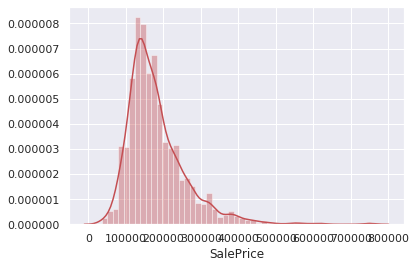

In [0]:
sns.distplot(train.SalePrice, color = 'r')

Max:    755000.00
Min:    34900.00
Mean:   180921.20
Median: 163000.00
Mad:    57434.77
Var:    6311111264.30
Std:    79442.50
Skew:   1.88
Kurt:   6.54


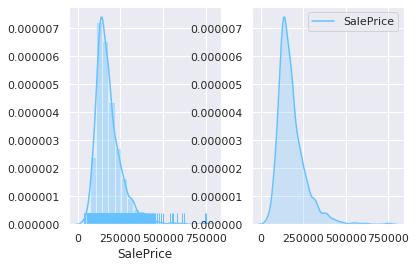

In [0]:
print("Max:    %.2f\nMin:    %.2f\nMean:   %.2f\nMedian: %.2f\nMad:    %.2f\nVar:    %.2f\nStd:    %.2f\nSkew:   %.2f\nKurt:   %.2f" %
      (train_label.max(), train_label.min(), train_label.mean(), train_label.median(), train_label.mad(),
       train_label.var(), train_label.std(), train_label.skew(), train_label.kurt()))
fig, axes = plt.subplots(1, 2)
sns.distplot(train['SalePrice'], ax=axes[0], bins=20, kde=True, rug=True)
sns.kdeplot(train['SalePrice'], ax=axes[1], shade=True)
plt.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


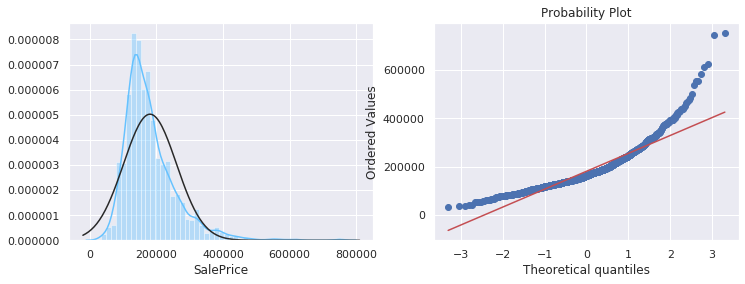

In [0]:
print(train.SalePrice.describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(train.SalePrice.dropna() , fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(train.SalePrice.dropna(), plot=plt)

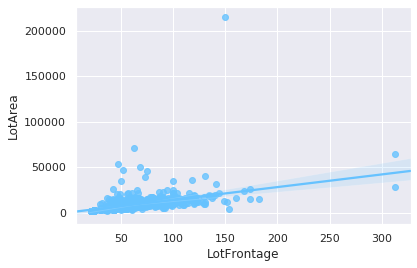

In [0]:
sns.regplot(x='LotFrontage',y='LotArea',data=train)

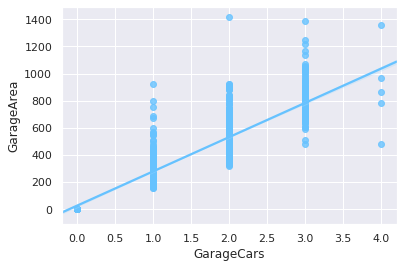

In [0]:
sns.regplot(x='GarageCars',y='GarageArea',data=train)


In [0]:
def analyst_data_distribution(train, test):
    
    NAs = pd.concat([train.isnull().sum()/len(train) * 100, test.isnull().sum()/len(test) * 100], axis=1, keys=['Train', 'Test'],
                    sort=True)
    print (NAs[NAs.sum(axis=1) > 0].sort_values(by=["Train", "Test"],ascending=[False, False]))
    
def analyst_data_distribution(train, test):
    NAs = pd.concat([train.isnull().sum()/len(train) * 100, test.isnull().sum()/len(test) * 100], axis=1, keys=['Train', 'Test'],
                    sort=True)
    print( NAs[NAs.sum(axis=1) > 0].sort_values(by=["Train", "Test"],ascending=[False, False]))

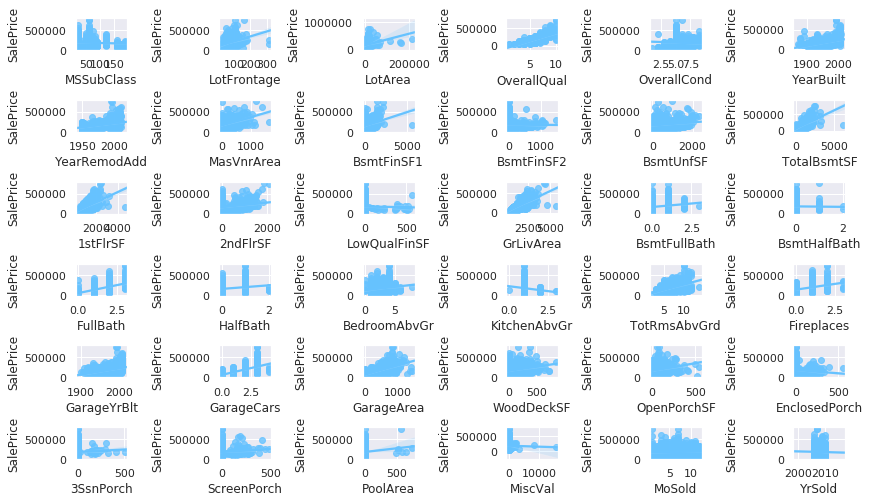

In [0]:
# original numerical distribution
fig0 = plt.figure(figsize=(12, 7))
for i in np.arange(36):
    ax = fig0.add_subplot(6, 6, i+1)
    sns.regplot(x=train_numerical_data.iloc[:, i], y=train['SalePrice'])
plt.tight_layout()
plt.show()

In [0]:
train_category_data = train.select_dtypes(include=[np.object])
test_category_data = test.select_dtypes(include=[np.object])
print ("train category feature shape： {}".format(train_category_data.shape))
print ("test category feature shape: {}".format(test_category_data.shape))
NA_category_data = pd.concat([train_category_data.isnull().sum()/len(train_category_data)* 100, test_category_data.isnull().sum()/len(test_category_data) * 100],
                             axis=1, keys=['Train_Missing', 'Test_Missing'], sort=True)
print("category feature table is")
print(NA_category_data[NA_category_data.sum(axis=1) >0].sort_values(by=['Train_Missing', 'Test_Missing'],ascending=[False, False]))

train category feature shape： (1460, 43)
test category feature shape: (1459, 43)
category feature table is
              Train_Missing  Test_Missing
PoolQC            99.520548     99.794380
MiscFeature       96.301370     96.504455
Alley             93.767123     92.666210
Fence             80.753425     80.123372
FireplaceQu       47.260274     50.034270
GarageCond         5.547945      5.346127
GarageFinish       5.547945      5.346127
GarageQual         5.547945      5.346127
GarageType         5.547945      5.209047
BsmtExposure       2.602740      3.015764
BsmtFinType2       2.602740      2.878684
BsmtCond           2.534247      3.084304
BsmtQual           2.534247      3.015764
BsmtFinType1       2.534247      2.878684
MasVnrType         0.547945      1.096642
Electrical         0.068493      0.000000
MSZoning           0.000000      0.274160
Functional         0.000000      0.137080
Utilities          0.000000      0.137080
Exterior1st        0.000000      0.068540
Exterior2nd

In [0]:
# numeric feature
train_numerical_data = train.select_dtypes(include=[np.number])
test_numerical_data = test.select_dtypes(include=[np.number])
print ("train numerical feature shape: {}".format(train_numerical_data.shape))
print ("test numerical feature shape: {}".format(test_numerical_data.shape))

NA_numerical_data = pd.concat([train_numerical_data.isnull().sum() / len(train_numerical_data) * 100,
                               train_numerical_data.max(), train_numerical_data.min(),
                               train_numerical_data.mean(), train_numerical_data.median(), train_numerical_data.std(),
                               test_numerical_data.isnull().sum() / len(test_category_data)* 100,
                               test_numerical_data.max(), test_numerical_data.min(),
                               test_numerical_data.mean(), test_numerical_data.median(), test_numerical_data.std()],
                              axis=1, keys=['Train_Missing', 'Train_Max', 'Train_Min', 'Train_Mean', 'Train_Median', 'Train_std',
                                            'Test_Missing', 'Test_Max', 'Test_Min', 'Test_Mean', 'Test_Median', 'Test_Std'], sort=True)
print("numerical feature table is")
print(NA_numerical_data[NA_numerical_data.sum(axis=1) > 0].sort_values(by=['Train_Missing', 'Train_Max', 'Train_Min', 'Train_Mean', 'Train_Median', 'Train_std',
                                                                           'Test_Missing', 'Test_Max', 'Test_Min', 'Test_Mean', 'Test_Median', 'Test_Std'],
                                                                       ascending=[False, False, False, False, False, False,
                                                                                  False, False, False, False, False, False]))

train numerical feature shape: (1460, 37)
test numerical feature shape: (1459, 36)
numerical feature table is
               Train_Missing  Train_Max  ...  Test_Median     Test_Std
LotFrontage        17.739726      313.0  ...         67.0    22.376841
GarageYrBlt         5.547945     2010.0  ...       1979.0    26.431175
MasVnrArea          0.547945     1600.0  ...          0.0   177.625900
SalePrice           0.000000   755000.0  ...          NaN          NaN
LotArea             0.000000   215245.0  ...       9399.0  4955.517327
MiscVal             0.000000    15500.0  ...          0.0   630.806978
TotalBsmtSF         0.000000     6110.0  ...        988.0   442.898624
BsmtFinSF1          0.000000     5644.0  ...        350.5   455.268042
GrLivArea           0.000000     5642.0  ...       1432.0   485.566099
1stFlrSF            0.000000     4692.0  ...       1079.0   398.165820
BsmtUnfSF           0.000000     2336.0  ...        460.0   437.260486
2ndFlrSF            0.000000     2065.

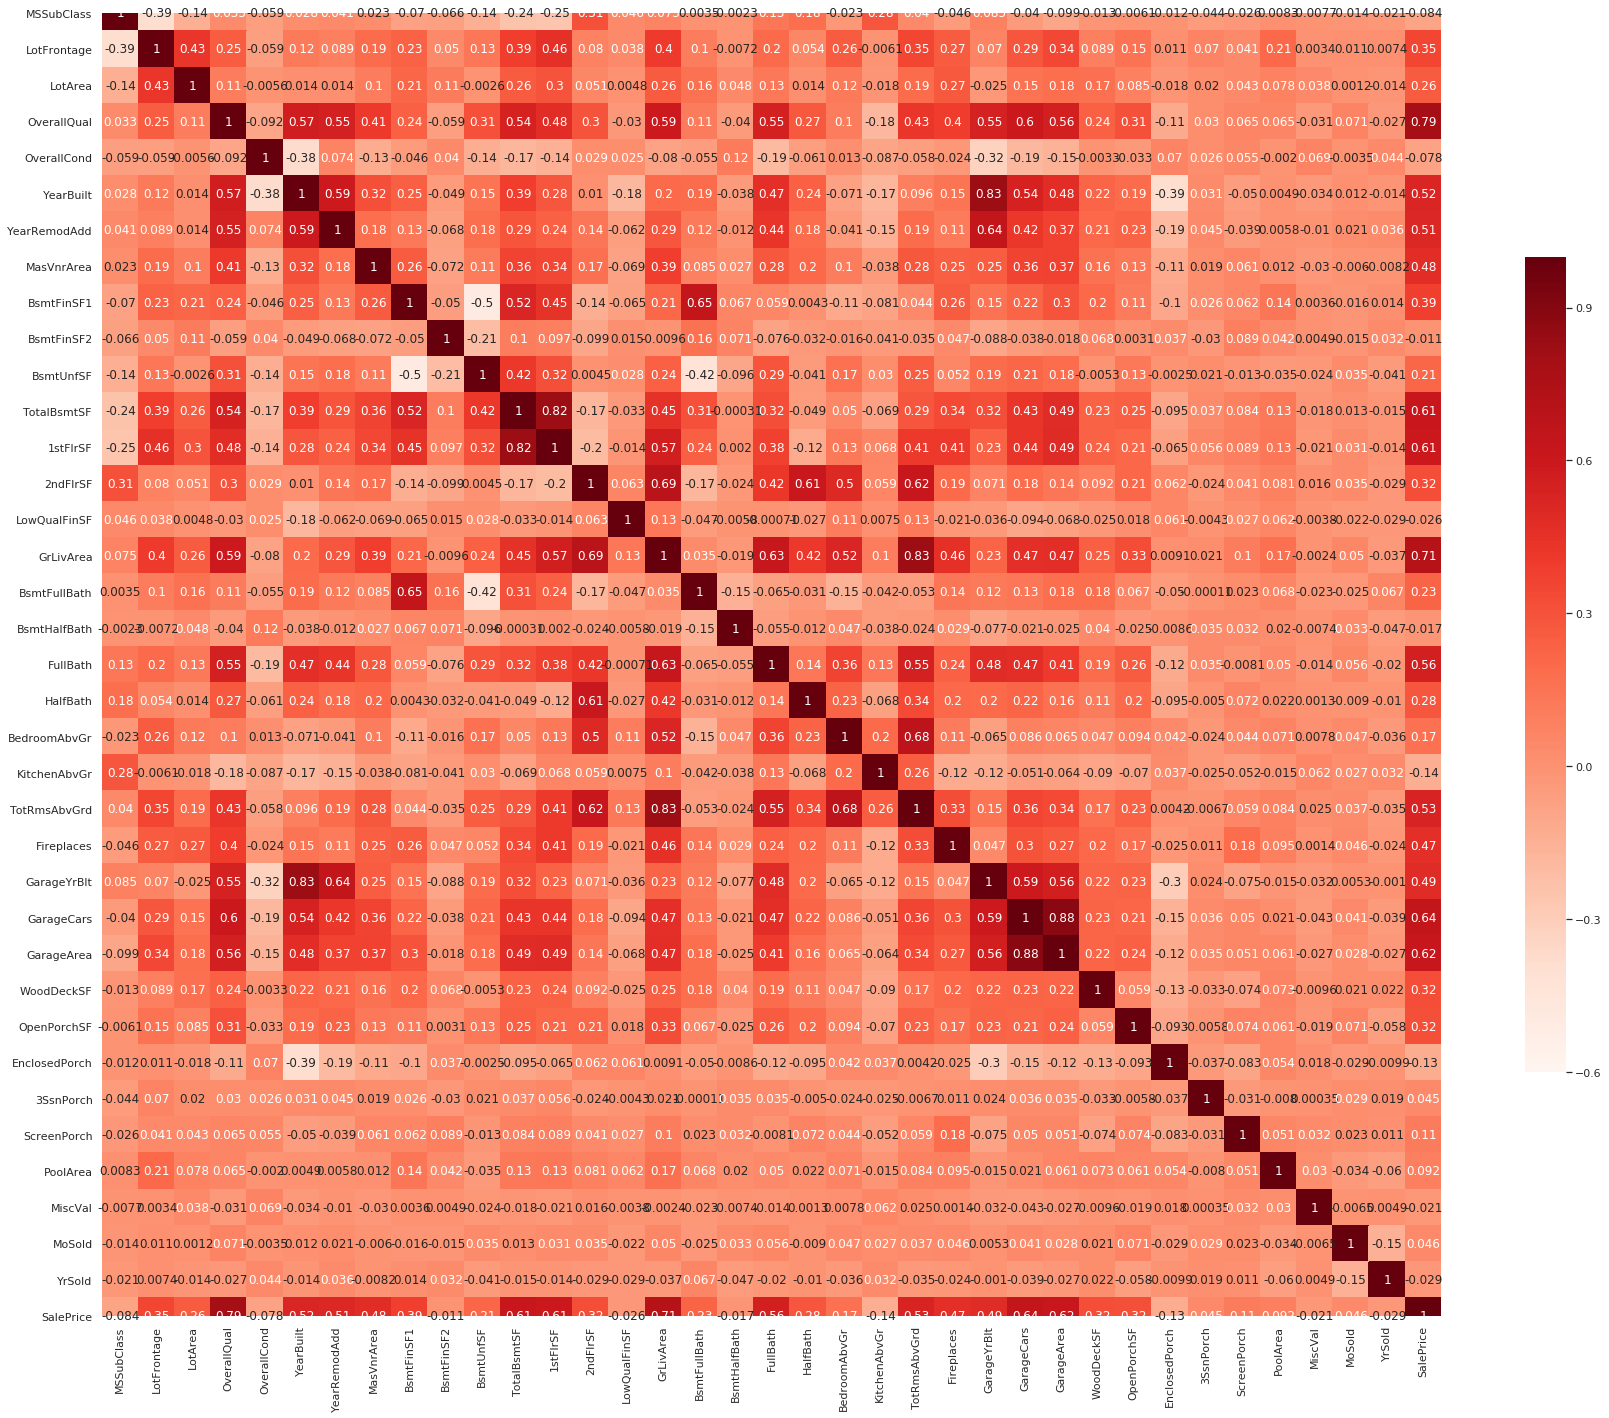

In [0]:
corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="Reds", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [0]:
import numpy as np

n_largest_top = 31
n_smallest_top = 15
top_large_corr = train.nlargest(n_largest_top, 'SalePrice')['SalePrice']
top_small_corr = train.nsmallest(n_smallest_top, 'SalePrice')['SalePrice']
print("Top Largest Corrolations :") 
print(top_large_corr)
print("____________________________")
print("Top Smallest Corrolations :") 
print(top_small_corr)
num_attrs = np.append(top_large_corr.index.values, top_small_corr.index.values, axis=0)

Top Largest Corrolations :
691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
1142    424870
664     423000
278     415298
161     412500
1353    410000
231     403000
515     402861
661     402000
987     395192
774     395000
1437    394617
Name: SalePrice, dtype: int64
____________________________
Top Smallest Corrolations :
495     34900
916     35311
968     37900
533     39300
30      40000
710     52000
1337    52500
705     55000
1325    55000
812     55993
1380    58500
410     60000
636     60000
1100    60000
375     61000
Name: SalePrice, dtype: int64


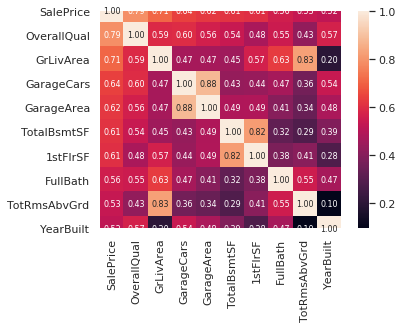

In [0]:
correlation = train.corr()
k = 10 
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

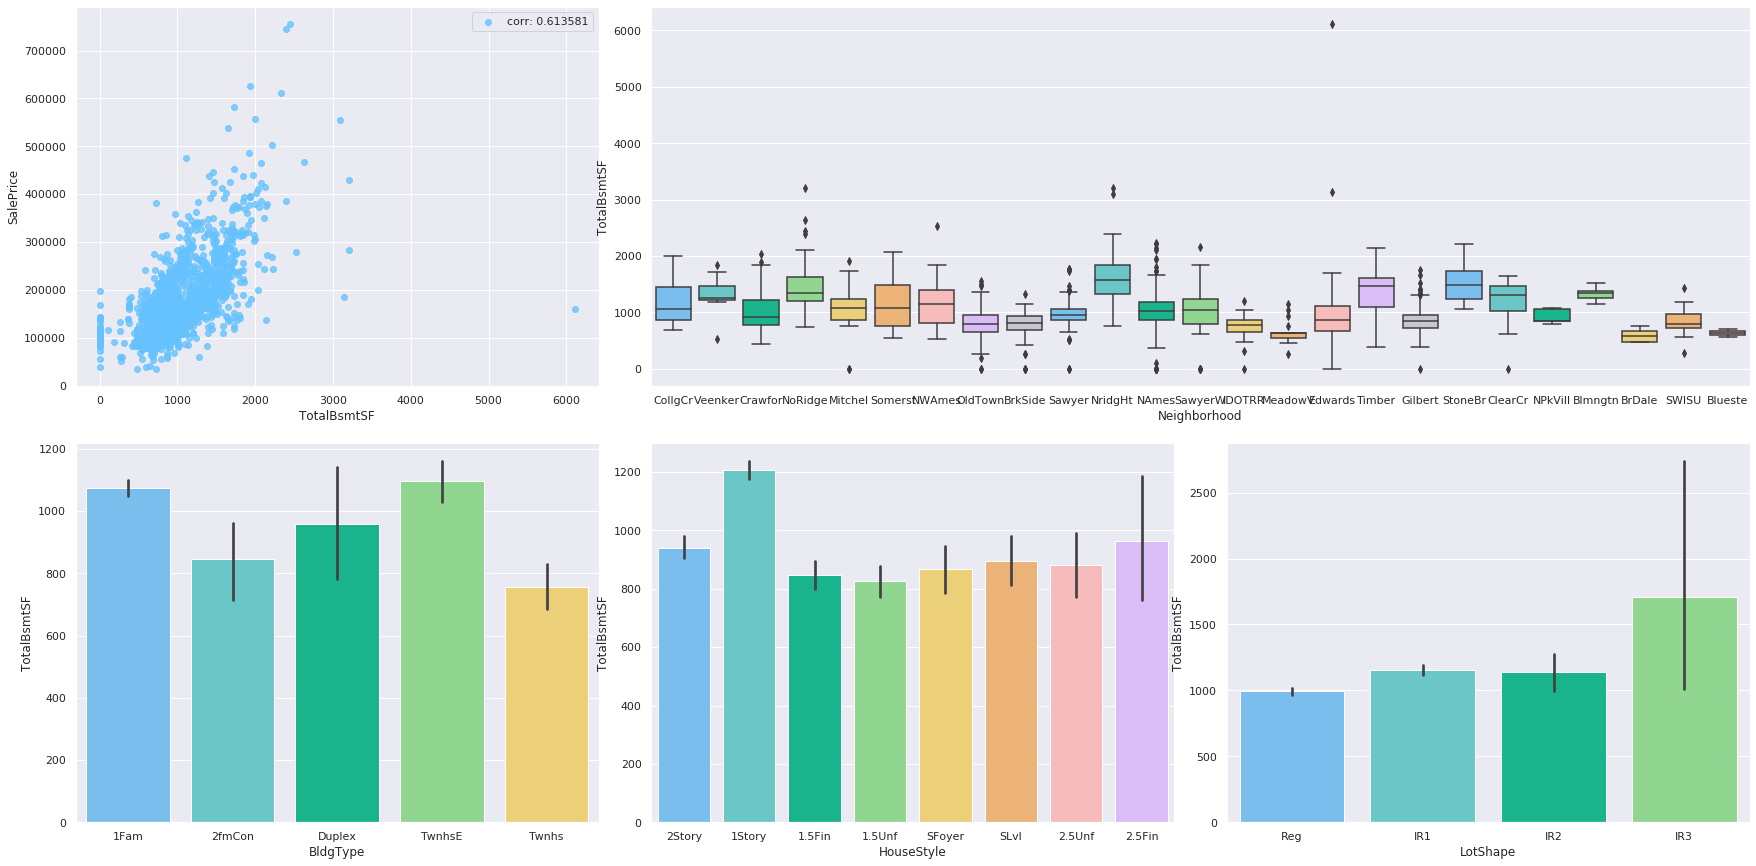

In [0]:
from scipy.stats.stats import pearsonr
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 9)
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalBsmtSF", data=train, palette = mycols);

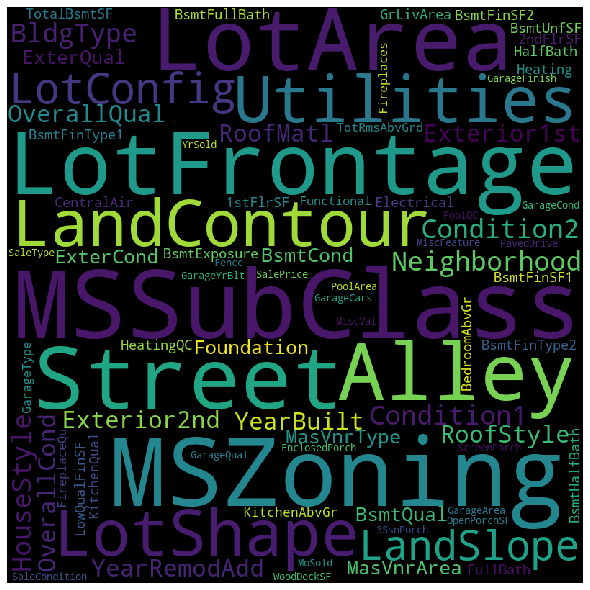

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

names = ' '
for name in train:
    name = str(name)
    names = names + name + ' '
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(names) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()